<a href="https://colab.research.google.com/github/OsEduIT/GVIS-Automatic-Classification-of-Cyberincidents-using-Machine-Learning/blob/main/Programa_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación automática de incidentes mediante técnicas de Deep Learing

Autores: Oscar Caiza, Eduardo Fidalgo, Juan Jose Sotes

UNIVERSIDAD DE LEÓN

GVIS

# Instalación de librerias

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
from bs4 import BeautifulSoup
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
#df_clean_final = df3[['desp_clean_final','INCIBE TAXONOMY']]  

In [ ]:
#df_clean_final.to_csv(r'/content/drive/My Drive/Colab Notebooks\export_dataframe.csv',index=False,header=True)

# Cargar el Corpus

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls "/content/drive/My Drive/Colab Notebooks"

 BERT-02.ipynb
'Copia de ClaseVectorizacionTextos.ipynb'
'Copia de clasificacion_multiclase.ipynb'
'Copia de Fine tuning RoBERTa - Unhealthy Comment Corpus - Tutorial'
'Copia de gpt2_finetune_classification.ipynb'
'Copia de metricas_clasificacion.ipynb'
'Copia de Programa_02_comparasión_final.ipynb'
'Copia de Web scraping de Google Maps con Python + Selenium'
 DATA.csv
 datos.csv
 DATOS-TC1-GVIS.xlsx
 DocumentosAcreditativosMeritosOscar_plazaU226
 GoogleNews-vectors-negative300.bin.gz
 Matplotlib.ipynb
 merged-cleaned1.csv
 merged_cleaned.csv
 PipelineLimpieza-Encoder-Clasificador.ipynb
'PRC DATA BREACH.xlsx'
'Prepocesado de Datos.ipynb'
 PrimeraPruebaConcepto.ipynb
 Programa_01.ipynb
 Programa_02_BERT.ipynb
'Programa_02_CNN (1).ipynb'
 Programa_02_CNN.ipynb
 Programa_02_comparasión.ipynb
 Programa_02_LSTM.ipynb
 TFM_01.ipynb
 Untitled0.ipynb
 web_scraping_01.ipynb


In [5]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/datos.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8918 entries, 0 to 8917
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   desp_clean_final  8901 non-null   object
 1   INCIBE TAXONOMY   8918 non-null   object
dtypes: object(2)
memory usage: 139.5+ KB


In [7]:
df.head()

,desp_clean_final,INCIBE TAXONOMY
0,compani websit breach sometim around februari ...,HC
1,decemb 29 2011 theft laptop park car san franc...,DL
2,bdo contract rubio perform financi audit servi...,DL
3,februari 10 2012 dhi mortgag becam awar softwa...,HC
4,offic burglari new year eve 2011 result loss h...,DL


In [8]:
print(len(df))

8918


In [9]:
df1 = df.dropna(axis='index',how='any') 

In [10]:
print(len(df))
print(len(df1))

8918
8901


In [11]:
df1.head()

,desp_clean_final,INCIBE TAXONOMY
0,compani websit breach sometim around februari ...,HC
1,decemb 29 2011 theft laptop park car san franc...,DL
2,bdo contract rubio perform financi audit servi...,DL
3,februari 10 2012 dhi mortgag becam awar softwa...,HC
4,offic burglari new year eve 2011 result loss h...,DL


In [12]:
labels = sorted(df1['INCIBE TAXONOMY'].unique())
labels

['DL', 'DOI', 'HC', 'OTHERS', 'PAC', 'THEFT', 'UAI']

In [13]:
df1['INCIBE TAXONOMY'].value_counts() #datos desbalaneceados

HC        2527
DOI       1854
THEFT     1728
DL        1416
OTHERS     702
PAC        606
UAI         68
Name: INCIBE TAXONOMY, dtype: int64

# Visualizacion

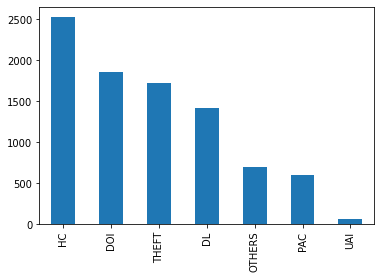

In [14]:
import matplotlib.pyplot as plt
df1['INCIBE TAXONOMY'].value_counts().plot.bar()
plt.show()

# LSTM for Text Classification

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Maximo numero de palabras usadas
MAX_NB_WORDS = 500000
# Maximo numero de palabras en cada descripción
MAX_SEQUENCE_LENGTH = 500
# La dimensión del embeding
EMBEDDING_DIM = 400

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df1['desp_clean_final'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 13616 unique tokens.


In [17]:
print(word_index)

{'inform': 1, 'breach': 2, 'number': 3, 'secur': 4, 'name': 5, 'locat': 6, 'employe': 7, 'social': 8, 'address': 9, 'access': 10, 'card': 11, 'may': 12, 'patient': 13, 'data': 14, 'custom': 15, 'includ': 16, 'date': 17, 'theft': 18, 'person': 19, 'contain': 20, 'unauthor': 21, 'account': 22, 'email': 23, 'affect': 24, 'credit': 25, 'comput': 26, 'record': 27, 'offic': 28, 'use': 29, 'health': 30, 'laptop': 31, 'provid': 32, 'incid': 33, 'expos': 34, 'compani': 35, 'birth': 36, 'stolen': 37, 'servic': 38, 'medic': 39, 'system': 40, 'file': 41, 'discov': 42, 'report': 43, 'hacker': 44, 'investig': 45, 'notifi': 46, 'accessdisclosur': 47, 'student': 48, 'gener': 49, 'password': 50, 'attorney': 51, 'compromis': 52, 'former': 53, 'individu': 54, 'one': 55, 'also': 56, 'websit': 57, 'peopl': 58, 'hackingit': 59, 'payment': 60, 'state': 61, 'result': 62, 'bank': 63, 'sent': 64, 'server': 65, 'onlin': 66, 'indiana': 67, 'phone': 68, 'user': 69, 'univers': 70, 'two': 71, 'document': 72, 'curren

In [18]:
X = tokenizer.texts_to_sequences(df1['desp_clean_final'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (8901, 500)


In [19]:
Y = pd.get_dummies(df1['INCIBE TAXONOMY']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (8901, 7)


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7120, 500) (7120, 7)
(1781, 500) (1781, 7)


In [ ]:
#train_aux_x, test_x,train_aux_y, test_y = train_test_split(X,Y,test_size=0.2, random_state=42)
#train_x, train_y, validate_x,validate_y = train_test_split(train_aux_x,train_aux_y, test_size=0.25, random_state=42)
#print(train_x.shape,train_y.shape)
#print(test_x.shape,test_y.shape)
#print(validate_x.shape,validate_y.shape)

In [21]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [22]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *

In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
#STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
#import plotly.graph_objs as go
#import plotly.plotly as py
#import cufflinks
#from IPython.core.interactiveshell import InteractiveShell
#import plotly.figure_factory as ff
#InteractiveShell.ast_node_interactivity = 'all'
#from plotly.offline import iplot
#cufflinks.go_offline()
#cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# LSTM + Adam 

In [24]:
embedding_vector_length=200
modelx01 = Sequential()
modelx01.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=embedding_vector_length, input_length=X.shape[1]))
modelx01.add(LSTM(units=300, use_bias=False, return_sequences=True))
modelx01.add(BatchNormalization())
modelx01.add(Activation('relu'))
modelx01.add(LSTM(units=200,use_bias=False, return_sequences=True))
modelx01.add(BatchNormalization())
modelx01.add(Activation('relu'))
modelx01.add(LSTM(units=100,use_bias=False, return_sequences=False))
modelx01.add(BatchNormalization())
modelx01.add(Activation('relu'))
modelx01.add(Dense(units=7, activation='softmax'))

modelx01.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
print(modelx01.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 200)          100000000 
                                                                 
 lstm (LSTM)                 (None, 500, 300)          600000    
                                                                 
 batch_normalization (BatchN  (None, 500, 300)         1200      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 500, 300)          0         
                                                                 
 lstm_1 (LSTM)               (None, 500, 200)          400000    
                                                                 
 batch_normalization_1 (Batc  (None, 500, 200)         800       
 hNormalization)                                        

In [25]:
epochs=10
batch_size=16
history_modelx01 = modelx01.fit(X_train, Y_train, validation_split=0.3, epochs=epochs, verbose=1,batch_size=batch_size, callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)])

Epoch 1/10
312/312 [==============================] - 912s 3s/step - loss: 0.9700 - accuracy: 0.6531 - f1_m: 0.6300 - precision_m: 0.8594 - recall_m: 0.5140 - val_loss: 1.7016 - val_accuracy: 0.2046 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/10
312/312 [==============================] - 877s 3s/step - loss: 0.6089 - accuracy: 0.8060 - f1_m: 0.8012 - precision_m: 0.8936 - recall_m: 0.7308 - val_loss: 1.2205 - val_accuracy: 0.5140 - val_f1_m: 0.5025 - val_precision_m: 0.5311 - val_recall_m: 0.4785
Epoch 3/10
312/312 [==============================] - 877s 3s/step - loss: 0.4342 - accuracy: 0.8708 - f1_m: 0.8688 - precision_m: 0.9174 - recall_m: 0.8277 - val_loss: 0.8121 - val_accuracy: 0.7832 - val_f1_m: 0.7814 - val_precision_m: 0.8031 - val_recall_m: 0.7621
Epoch 4/10
312/312 [==============================] - 869s 3s/step - loss: 0.3084 - accuracy: 0.9075 - f1_m: 0.9082 - precision_m: 0.9358 - recall_m: 0.8838 - val_loss: 0.6701 - val_accur

In [26]:
accrx01 = modelx01.evaluate(X_test,Y_test)
print('Test set\n Loss: {:0.4f}\n Accuracy: {:0.4f}\n f1_score: {:0.4f}\n Precision: {:0.4f}\n Recall: {:0.4f}'.format(accrx01[0],accrx01[1],accrx01[2],accrx01[3],accrx01[4]))

56/56 [==============================] - 12s 223ms/step - loss: 2.3468 - accuracy: 0.3150 - f1_m: 0.0528 - precision_m: 0.2723 - recall_m: 0.0296
Test set
 Loss: 2.3468
 Accuracy: 0.3150
 f1_score: 0.0528
 Precision: 0.2723
 Recall: 0.0296


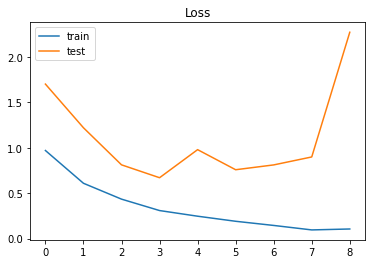

In [27]:
plt.title('Loss')
plt.plot(history_modelx01.history['loss'], label='train')
plt.plot(history_modelx01.history['val_loss'], label='test')
plt.legend()
plt.show();

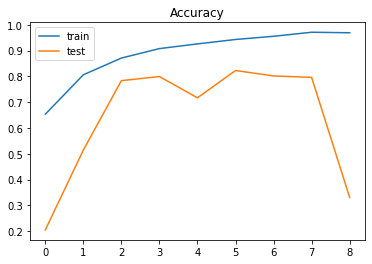

In [28]:
plt.title('Accuracy')
plt.plot(history_modelx01.history['accuracy'], label='train')
plt.plot(history_modelx01.history['val_accuracy'], label='test')
plt.legend()
plt.show();

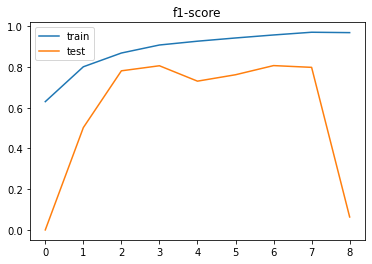

In [29]:
plt.title('f1-score')
plt.plot(history_modelx01.history['f1_m'], label='train')
plt.plot(history_modelx01.history['val_f1_m'], label='test')
plt.legend()
plt.show();

In [30]:
y_pred_01 = np.where(modelx01.predict(X_test)>.5,1,0)

In [31]:
from sklearn import metrics
print(metrics.classification_report(y_pred_01, Y_test,digits=4))

              precision    recall  f1-score   support

           0     0.0154    1.0000    0.0304         4
           1     0.0054    0.2222    0.0106         9
           2     0.0000    0.0000    0.0000         0
           3     0.0000    0.0000    0.0000         1
           4     0.2917    0.2632    0.2767       133
           5     0.0321    0.3438    0.0587        32
           6     0.0000    0.0000    0.0000         0

   micro avg     0.0292    0.2905    0.0531       179
   macro avg     0.0492    0.2613    0.0538       179
weighted avg     0.2231    0.2905    0.2173       179
 samples avg     0.0292    0.0292    0.0292       179



Text(33.0, 0.5, 'real')

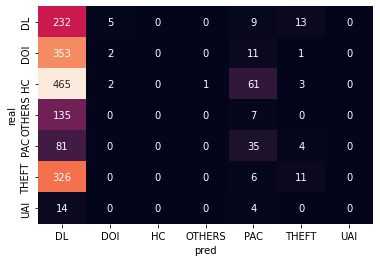

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat_LSTM_W2V01= confusion_matrix(np.asarray(Y_test).argmax(axis=1), np.asarray(y_pred_01).argmax(axis=1))
sns.heatmap(mat_LSTM_W2V01, 
            annot = True, 
            fmt = 'd',
            cbar = False,
            xticklabels = labels,
            yticklabels= labels)
plt.xlabel('pred')
plt.ylabel('real')

# LSTM + Adamax

In [33]:
modelx02 = Sequential()
modelx02.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=embedding_vector_length, input_length=X.shape[1]))
modelx02.add(LSTM(units=300, use_bias=False, return_sequences=True))
modelx02.add(BatchNormalization())
modelx02.add(Activation('relu'))
modelx02.add(LSTM(units=200,use_bias=False, return_sequences=True))
modelx02.add(BatchNormalization())
modelx02.add(Activation('relu'))
modelx02.add(LSTM(units=100,use_bias=False, return_sequences=False))
modelx02.add(BatchNormalization())
modelx02.add(Activation('relu'))
modelx02.add(Dense(units=7, activation='softmax'))

modelx02.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
print(modelx02.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 200)          100000000 
                                                                 
 lstm_3 (LSTM)               (None, 500, 300)          600000    
                                                                 
 batch_normalization_3 (Batc  (None, 500, 300)         1200      
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 500, 300)          0         
                                                                 
 lstm_4 (LSTM)               (None, 500, 200)          400000    
                                                                 
 batch_normalization_4 (Batc  (None, 500, 200)         800       
 hNormalization)                                      

In [34]:
epochs=10
batch_size=16
history_modelx02 = modelx02.fit(X_train, Y_train, validation_split=0.3, epochs=epochs, verbose=1,batch_size=batch_size, callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)])

Epoch 1/10
312/312 [==============================] - 891s 3s/step - loss: 1.0564 - accuracy: 0.6290 - f1_m: 0.5817 - precision_m: 0.8655 - recall_m: 0.4509 - val_loss: 1.7494 - val_accuracy: 0.2233 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/10
312/312 [==============================] - 881s 3s/step - loss: 0.7404 - accuracy: 0.7432 - f1_m: 0.7275 - precision_m: 0.8869 - recall_m: 0.6242 - val_loss: 0.8016 - val_accuracy: 0.7355 - val_f1_m: 0.6984 - val_precision_m: 0.8844 - val_recall_m: 0.5835
Epoch 3/10
312/312 [==============================] - 877s 3s/step - loss: 0.5770 - accuracy: 0.8130 - f1_m: 0.8048 - precision_m: 0.9067 - recall_m: 0.7288 - val_loss: 0.6196 - val_accuracy: 0.7954 - val_f1_m: 0.7976 - val_precision_m: 0.8696 - val_recall_m: 0.7402
Epoch 4/10
312/312 [==============================] - 855s 3s/step - loss: 0.4741 - accuracy: 0.8491 - f1_m: 0.8425 - precision_m: 0.9099 - recall_m: 0.7879 - val_loss: 0.6046 - val_accur

In [35]:
accrx02 = modelx02.evaluate(X_test,Y_test)
print('Test set\n Loss: {:0.4f}\n Accuracy: {:0.4f}\n f1_score: {:0.4f}\n Precision: {:0.4f}\n Recall: {:0.4f}'.format(accrx02[0],accrx02[1],accrx02[2],accrx02[3],accrx02[4]))

56/56 [==============================] - 12s 217ms/step - loss: 0.7562 - accuracy: 0.8097 - f1_m: 0.8159 - precision_m: 0.8402 - recall_m: 0.7935
Test set
 Loss: 0.7562
 Accuracy: 0.8097
 f1_score: 0.8159
 Precision: 0.8402
 Recall: 0.7935


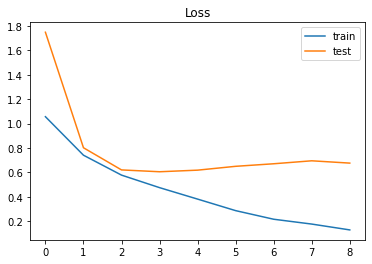

In [36]:
plt.title('Loss')
plt.plot(history_modelx02.history['loss'], label='train')
plt.plot(history_modelx02.history['val_loss'], label='test')
plt.legend()
plt.show();

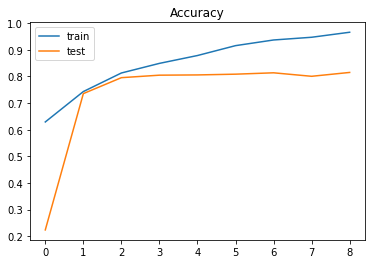

In [37]:
plt.title('Accuracy')
plt.plot(history_modelx02.history['accuracy'], label='train')
plt.plot(history_modelx02.history['val_accuracy'], label='test')
plt.legend()
plt.show();

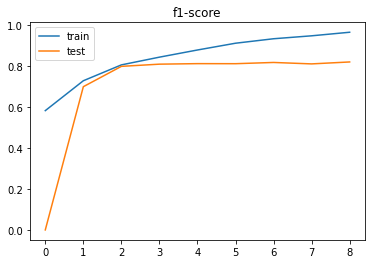

In [38]:
plt.title('f1-score')
plt.plot(history_modelx02.history['f1_m'], label='train')
plt.plot(history_modelx02.history['val_f1_m'], label='test')
plt.legend()
plt.show();

In [39]:
y_pred_02 = np.where(modelx02.predict(X_test)>.5,1,0)

In [40]:
from sklearn import metrics
print(metrics.classification_report(y_pred_02, Y_test,digits=4))

              precision    recall  f1-score   support

           0     0.8456    0.8141    0.8295       269
           1     0.7439    0.8053    0.7734       339
           2     0.8816    0.8558    0.8685       548
           3     0.7746    0.9402    0.8494       117
           4     0.6000    0.6729    0.6344       107
           5     0.7784    0.9082    0.8383       294
           6     0.1667    0.3750    0.2308         8

   micro avg     0.7934    0.8401    0.8161      1682
   macro avg     0.6844    0.7674    0.7178      1682
weighted avg     0.8013    0.8401    0.8186      1682
 samples avg     0.7934    0.7934    0.7934      1682



Text(33.0, 0.5, 'real')

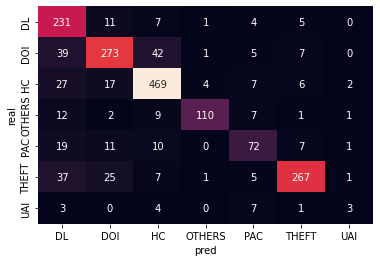

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat_LSTM_W2V02= confusion_matrix(np.asarray(Y_test).argmax(axis=1), np.asarray(y_pred_02).argmax(axis=1))
sns.heatmap(mat_LSTM_W2V02, 
            annot = True, 
            fmt = 'd',
            cbar = False,
            xticklabels = labels,
            yticklabels= labels)
plt.xlabel('pred')
plt.ylabel('real')

# CNN + Adam

In [42]:
modelx03 = Sequential()
modelx03.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=embedding_vector_length, input_length=X.shape[1]))

modelx03.add(Conv1D(filters=300, kernel_size=7, padding='same', activation='relu'))
modelx03.add(MaxPooling1D(pool_size=3))
modelx03.add(BatchNormalization())
modelx03.add(Activation('relu'))

modelx03.add(Conv1D(filters=100, kernel_size=7, padding='same', activation='relu'))
modelx03.add(MaxPooling1D(pool_size=2))
modelx03.add(BatchNormalization())
modelx03.add(Activation('relu'))

modelx03.add(Flatten())
modelx03.add(Dense(units=10, activation='relu'))
modelx03.add(Dense(units=7, activation='softmax'))

# compile the model
modelx03.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
print(modelx03.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 200)          100000000 
                                                                 
 conv1d (Conv1D)             (None, 500, 300)          420300    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 166, 300)         0         
 )                                                               
                                                                 
 batch_normalization_6 (Batc  (None, 166, 300)         1200      
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 166, 300)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 166, 100)         

In [43]:
epochs=10
batch_size=16
# fit the model
history_modelx03 = modelx03.fit(X_train, Y_train, validation_split=0.3, epochs=epochs, verbose=1,batch_size=batch_size, callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)])

Epoch 1/10
312/312 [==============================] - 31s 67ms/step - loss: 1.4107 - accuracy: 0.4711 - f1_m: 0.3523 - precision_m: 0.8322 - recall_m: 0.2350 - val_loss: 1.6097 - val_accuracy: 0.4944 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/10
312/312 [==============================] - 21s 68ms/step - loss: 1.0594 - accuracy: 0.6621 - f1_m: 0.5749 - precision_m: 0.8911 - recall_m: 0.4353 - val_loss: 6.8681 - val_accuracy: 0.4148 - val_f1_m: 0.4147 - val_precision_m: 0.4152 - val_recall_m: 0.4142
Epoch 3/10
312/312 [==============================] - 21s 66ms/step - loss: 0.8206 - accuracy: 0.7534 - f1_m: 0.6722 - precision_m: 0.9201 - recall_m: 0.5369 - val_loss: 15.6568 - val_accuracy: 0.3984 - val_f1_m: 0.4001 - val_precision_m: 0.4004 - val_recall_m: 0.3997
Epoch 4/10
312/312 [==============================] - 21s 66ms/step - loss: 0.6108 - accuracy: 0.8325 - f1_m: 0.7418 - precision_m: 0.9292 - recall_m: 0.6248 - val_loss: 2.8863 - val_

In [44]:
accrx03 = modelx03.evaluate(X_test,Y_test)
print('Test set\n Loss: {:0.4f}\n Accuracy: {:0.4f}\n f1_score: {:0.4f}\n Precision: {:0.4f}\n Recall: {:0.4f}'.format(accrx03[0],accrx03[1],accrx03[2],accrx03[3],accrx03[4]))

56/56 [==============================] - 1s 9ms/step - loss: 40.0674 - accuracy: 0.0983 - f1_m: 0.0983 - precision_m: 0.0983 - recall_m: 0.0982
Test set
 Loss: 40.0674
 Accuracy: 0.0983
 f1_score: 0.0983
 Precision: 0.0983
 Recall: 0.0982


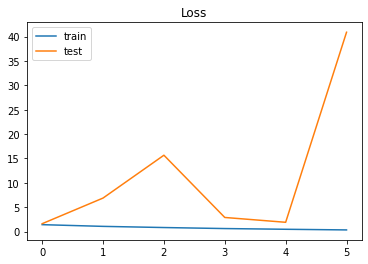

In [45]:
plt.title('Loss')
plt.plot(history_modelx03.history['loss'], label='train')
plt.plot(history_modelx03.history['val_loss'], label='test')
plt.legend()
plt.show();

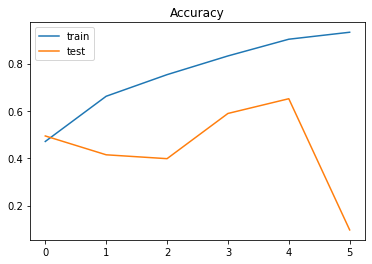

In [46]:
plt.title('Accuracy')
plt.plot(history_modelx03.history['accuracy'], label='train')
plt.plot(history_modelx03.history['val_accuracy'], label='test')
plt.legend()
plt.show();

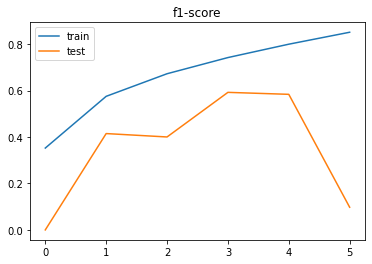

In [47]:
plt.title('f1-score')
plt.plot(history_modelx03.history['f1_m'], label='train')
plt.plot(history_modelx03.history['val_f1_m'], label='test')
plt.legend()
plt.show();

In [48]:
y_pred_03 = np.where(modelx03.predict(X_test)>.5,1,0)

In [49]:
from sklearn import metrics
print(metrics.classification_report(y_pred_03, Y_test,digits=4))

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         0
           1     0.0245    0.7500    0.0475        12
           2     0.0865    0.3217    0.1363       143
           3     0.0000    0.0000    0.0000         0
           4     1.0000    0.0738    0.1375      1625
           5     0.0000    0.0000    0.0000         0
           6     0.0000    0.0000    0.0000         0

   micro avg     0.0983    0.0983    0.0983      1780
   macro avg     0.1587    0.1636    0.0459      1780
weighted avg     0.9200    0.0983    0.1368      1780
 samples avg     0.0983    0.0983    0.0983      1780



Text(33.0, 0.5, 'real')

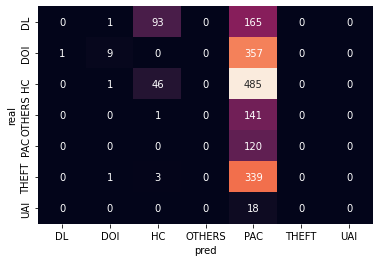

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat_CNN_W2V01= confusion_matrix(np.asarray(Y_test).argmax(axis=1), np.asarray(y_pred_03).argmax(axis=1))
sns.heatmap(mat_CNN_W2V01, 
            annot = True, 
            fmt = 'd',
            cbar = False,
            xticklabels = labels,
            yticklabels= labels)
plt.xlabel('pred')
plt.ylabel('real')

# CNN + Adamax

In [51]:
# CNN model + Adamax
modelx04 = Sequential()
modelx04.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=embedding_vector_length, input_length=X.shape[1]))

modelx04.add(Conv1D(filters=300, kernel_size=7, padding='same', activation='relu'))
modelx04.add(MaxPooling1D(pool_size=3))
modelx04.add(BatchNormalization())
modelx04.add(Activation('relu'))

modelx04.add(Conv1D(filters=100, kernel_size=7, padding='same', activation='relu'))
modelx04.add(MaxPooling1D(pool_size=2))
modelx04.add(BatchNormalization())
modelx04.add(Activation('relu'))

modelx04.add(Flatten())
modelx04.add(Dense(units=10, activation='relu'))
modelx04.add(Dense(units=7, activation='softmax'))

# compile the model
modelx04.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
print(modelx04.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 200)          100000000 
                                                                 
 conv1d_2 (Conv1D)           (None, 500, 300)          420300    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 166, 300)         0         
 1D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 166, 300)         1200      
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 166, 300)          0         
                                                                 
 conv1d_3 (Conv1D)           (None, 166, 100)         

In [52]:
epochs=10
batch_size=16
# fit the model
history_modelx04 = modelx04.fit(X_train, Y_train, validation_split=0.3, epochs=epochs, verbose=1,batch_size=batch_size, callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)])

Epoch 1/10
312/312 [==============================] - 7s 19ms/step - loss: 1.1797 - accuracy: 0.5566 - f1_m: 0.5211 - precision_m: 0.9100 - recall_m: 0.3786 - val_loss: 1.7999 - val_accuracy: 0.6264 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/10
312/312 [==============================] - 5s 16ms/step - loss: 0.7992 - accuracy: 0.6886 - f1_m: 0.7096 - precision_m: 0.9154 - recall_m: 0.5867 - val_loss: 1.0789 - val_accuracy: 0.6334 - val_f1_m: 0.4634 - val_precision_m: 0.9499 - val_recall_m: 0.3158
Epoch 3/10
312/312 [==============================] - 5s 16ms/step - loss: 0.5258 - accuracy: 0.8092 - f1_m: 0.8220 - precision_m: 0.9431 - recall_m: 0.7336 - val_loss: 0.8224 - val_accuracy: 0.7046 - val_f1_m: 0.7285 - val_precision_m: 0.8497 - val_recall_m: 0.6427
Epoch 4/10
312/312 [==============================] - 5s 16ms/step - loss: 0.2880 - accuracy: 0.9103 - f1_m: 0.9044 - precision_m: 0.9630 - recall_m: 0.8560 - val_loss: 1.0566 - val_accur

In [53]:
accrx04 = modelx04.evaluate(X_test,Y_test)
print('Test set\n Loss: {:0.4f}\n Accuracy: {:0.4f}\n f1_score: {:0.4f}\n Precision: {:0.4f}\n Recall: {:0.4f}'.format(accrx04[0],accrx04[1],accrx04[2],accrx04[3],accrx04[4]))

56/56 [==============================] - 0s 8ms/step - loss: 0.9818 - accuracy: 0.7608 - f1_m: 0.7676 - precision_m: 0.7985 - recall_m: 0.7398
Test set
 Loss: 0.9818
 Accuracy: 0.7608
 f1_score: 0.7676
 Precision: 0.7985
 Recall: 0.7398


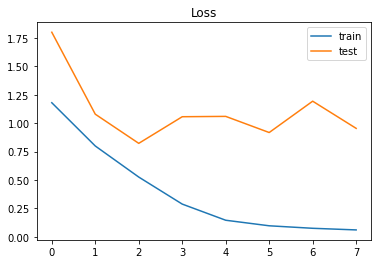

In [54]:
plt.title('Loss')
plt.plot(history_modelx04.history['loss'], label='train')
plt.plot(history_modelx04.history['val_loss'], label='test')
plt.legend()
plt.show();

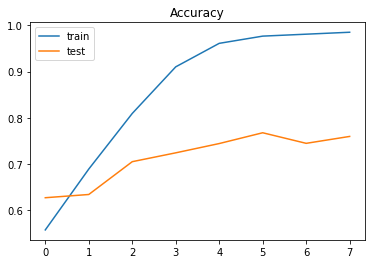

In [55]:
plt.title('Accuracy')
plt.plot(history_modelx04.history['accuracy'], label='train')
plt.plot(history_modelx04.history['val_accuracy'], label='test')
plt.legend()
plt.show();

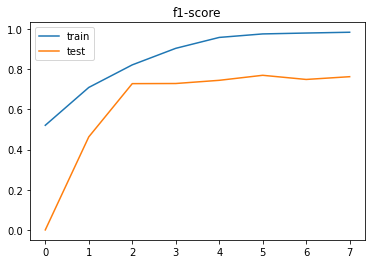

In [56]:
plt.title('f1-score')
plt.plot(history_modelx04.history['f1_m'], label='train')
plt.plot(history_modelx04.history['val_f1_m'], label='test')
plt.legend()
plt.show();

In [57]:
y_pred_04 = np.where(modelx04.predict(X_test)>.5,1,0)

In [58]:
from sklearn import metrics
print(metrics.classification_report(y_pred_04, Y_test,digits=4))

              precision    recall  f1-score   support

           0     0.7297    0.8670    0.7925       218
           1     0.6376    0.8125    0.7145       288
           2     0.8797    0.7335    0.8000       638
           3     0.7958    0.8828    0.8370       128
           4     0.5583    0.5726    0.5654       117
           5     0.7230    0.9466    0.8198       262
           6     0.0000    0.0000    0.0000         1

   micro avg     0.7406    0.7984    0.7684      1652
   macro avg     0.6177    0.6879    0.6470      1652
weighted avg     0.7631    0.7984    0.7730      1652
 samples avg     0.7406    0.7406    0.7406      1652



Text(33.0, 0.5, 'real')

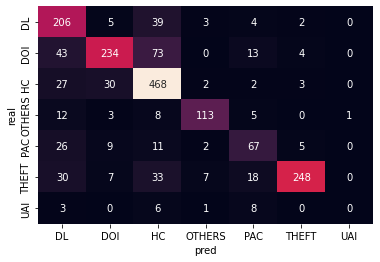

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat_CNN_W2V02= confusion_matrix(np.asarray(Y_test).argmax(axis=1), np.asarray(y_pred_04).argmax(axis=1))
sns.heatmap(mat_CNN_W2V02, 
            annot = True, 
            fmt = 'd',
            cbar = False,
            xticklabels = labels,
            yticklabels= labels)
plt.xlabel('pred')
plt.ylabel('real')

# LSTM + CNN for Text Classification 

In [65]:
# 10 minutos de ejecución

embedding_vector_length = 200
modelx05 = Sequential()

# Embedding layer
# Convolution-1D Layer 
# LSTM Layer 
# Dense Layer

modelx05.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=embedding_vector_length, input_length=X.shape[1]))
modelx05.add(Conv1D(filters=16, kernel_size=7, padding='same', activation='relu'))
modelx05.add(MaxPooling1D(pool_size=2))
modelx05.add(LSTM(200))
modelx05.add(Dense(units=7, activation='softmax'))

modelx05.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])
print(modelx05.summary())



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 500, 200)          100000000 
                                                                 
 conv1d_5 (Conv1D)           (None, 500, 16)           22416     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 250, 16)          0         
 1D)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 200)               173600    
                                                                 
 dense_7 (Dense)             (None, 7)                 1407      
                                                                 
Total params: 100,197,423
Trainable params: 100,197,423
Non-trainable params: 0
________________________________________

In [66]:
epochs = 10
batch_size = 16
history_modelx05 = modelx05.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
401/401 [==============================] - 31s 71ms/step - loss: 0.9239 - accuracy: 0.6650 - f1_m: 0.6096 - precision_m: 0.7895 - recall_m: 0.5162 - val_loss: 0.5851 - val_accuracy: 0.8118 - val_f1_m: 0.7999 - val_precision_m: 0.9125 - val_recall_m: 0.7167
Epoch 2/10
401/401 [==============================] - 28s 69ms/step - loss: 0.4721 - accuracy: 0.8511 - f1_m: 0.8492 - precision_m: 0.9139 - recall_m: 0.7966 - val_loss: 0.5467 - val_accuracy: 0.8413 - val_f1_m: 0.8302 - val_precision_m: 0.8780 - val_recall_m: 0.7903
Epoch 3/10
401/401 [==============================] - 28s 69ms/step - loss: 0.3154 - accuracy: 0.9018 - f1_m: 0.9047 - precision_m: 0.9434 - recall_m: 0.8713 - val_loss: 0.5576 - val_accuracy: 0.8357 - val_f1_m: 0.8417 - val_precision_m: 0.8799 - val_recall_m: 0.8083
Epoch 4/10
401/401 [==============================] - 28s 69ms/step - loss: 0.2381 - accuracy: 0.9268 - f1_m: 0.9281 - precision_m: 0.9571 - recall_m: 0.9027 - val_loss: 0.6244 - val_accuracy: 0.8

In [67]:
accrx05 = modelx05.evaluate(X_test,Y_test)
print('Test set\n Loss: {:0.4f}\n Accuracy: {:0.4f}\n f1_score: {:0.4f}\n Precision: {:0.4f}\n Recall: {:0.4f}'.format(accrx04[0],accrx04[1],accrx04[2],accrx04[3],accrx04[4]))

56/56 [==============================] - 1s 10ms/step - loss: 0.6545 - accuracy: 0.8282 - f1_m: 0.8340 - precision_m: 0.8577 - recall_m: 0.8122
Test set
 Loss: 0.9818
 Accuracy: 0.7608
 f1_score: 0.7676
 Precision: 0.7985
 Recall: 0.7398


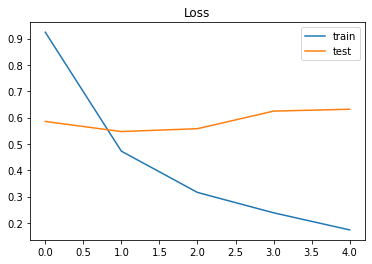

In [68]:
plt.title('Loss')
plt.plot(history_modelx05.history['loss'], label='train')
plt.plot(history_modelx05.history['val_loss'], label='test')
plt.legend()
plt.show();

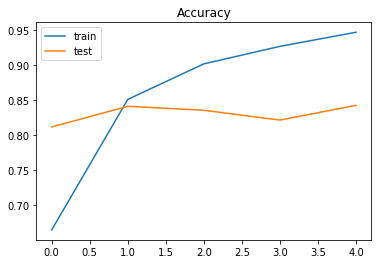

In [69]:
plt.title('Accuracy')
plt.plot(history_modelx05.history['accuracy'], label='train')
plt.plot(history_modelx05.history['val_accuracy'], label='test')
plt.legend()
plt.show();

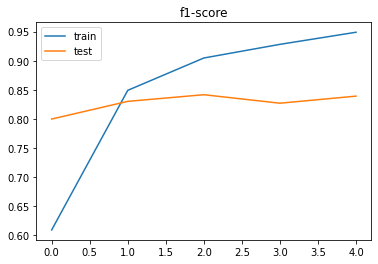

In [70]:
plt.title('f1-score')
plt.plot(history_modelx05.history['f1_m'], label='train')
plt.plot(history_modelx05.history['val_f1_m'], label='test')
plt.legend()
plt.show();

In [71]:
y_pred_05 = np.where(modelx05.predict(X_test)>.5,1,0)

In [72]:
from sklearn import metrics
print(metrics.classification_report(y_pred_05, Y_test,digits=4))

              precision    recall  f1-score   support

           0     0.8456    0.8866    0.8656       247
           1     0.7466    0.8616    0.8000       318
           2     0.8891    0.8616    0.8751       549
           3     0.7958    0.9339    0.8593       121
           4     0.6167    0.6916    0.6520       107
           5     0.8513    0.8563    0.8538       341
           6     0.0556    0.2500    0.0909         4

   micro avg     0.8119    0.8571    0.8339      1687
   macro avg     0.6858    0.7631    0.7138      1687
weighted avg     0.8223    0.8571    0.8381      1687
 samples avg     0.8119    0.8119    0.8119      1687



Text(33.0, 0.5, 'real')

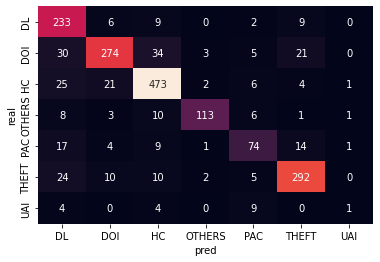

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat_CNN_03= confusion_matrix(np.asarray(Y_test).argmax(axis=1), np.asarray(y_pred_05).argmax(axis=1))
sns.heatmap(mat_CNN_03, 
            annot = True, 
            fmt = 'd',
            cbar = False,
            xticklabels = labels,
            yticklabels= labels)
plt.xlabel('pred')
plt.ylabel('real')

# Comparing the models

In [60]:
def show_values_on_bars(axs, h_v="v", space=0.2):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = "{:.2f}".format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = "{:.2f}".format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

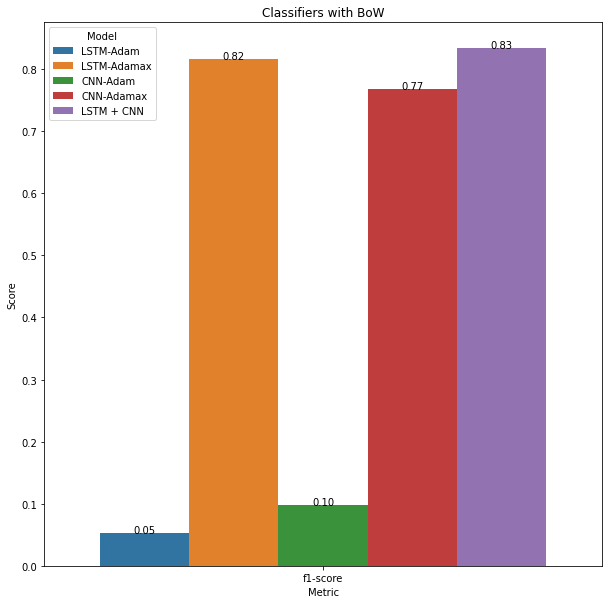

In [75]:
results=[]
#Test
results.append([accrx01[2], 'f1-score', 'LSTM-Adam'])
results.append([accrx02[2], 'f1-score', 'LSTM-Adamax'])
results.append([accrx03[2], 'f1-score', 'CNN-Adam'])
results.append([accrx04[2], 'f1-score', 'CNN-Adamax'])
results.append([accrx05[2], 'f1-score', 'LSTM + CNN'])

comparison = pd.DataFrame(results, columns = ['Score', 'Metric', 'Model'])

plt.figure(figsize=(10,10))
plt.title("Classifiers with BoW")
plot = sns.barplot(x=comparison['Metric'],y=comparison['Score'], hue = comparison['Model'])

show_values_on_bars(plot)